# Demonstration 6: Longitudinal Transition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import Helplessness
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Value Iteration

In [24]:
from sisyphus.mdp import ValueIteration

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value iteration.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize environment.
gym = Helplessness()

## Initialize value iteration.
qvi = ValueIteration(policy='betamax', gamma=0.95, beta=1)
qvi = qvi.fit(gym)
V_init = qvi.V.copy()
V_init[gym.terminal] = [10,-10,5,0]
Q_init = qvi.Q.copy()

## First iterations.
qvi = ValueIteration(policy='betamax', gamma=0.95, beta=0, max_iter=5)
qvi = qvi.fit(gym, Q_init, verbose=False)
V_early = qvi.V.copy()
V_early[gym.terminal] = [10,-10,5,0]

## 
qvi = qvi.fit(gym, qvi.Q.copy(), verbose=False)
V_mid = qvi.V.copy()
V_mid[gym.terminal] = [10,-10,5,0]

qvi = qvi.fit(gym, qvi.Q.copy(), verbose=False)
qvi = qvi.fit(gym, qvi.Q.copy(), verbose=False)
V_late = qvi.V.copy()
V_late[gym.terminal] = [10,-10,5,0]

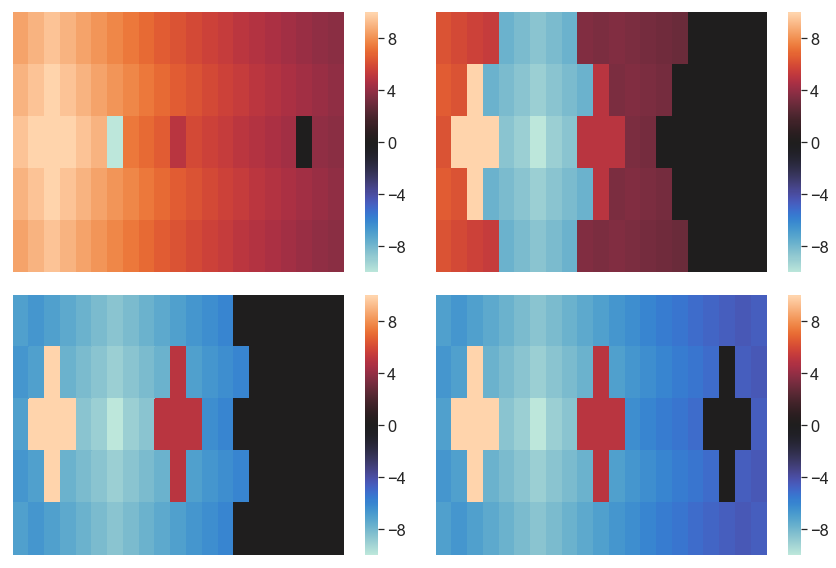

In [25]:
fig, axes = plt.subplots(2,2,figsize=(12,8))
sns.heatmap(V_init.reshape(gym.shape), vmin=-10, vmax=10, center=0, ax=axes[0,0])
sns.heatmap(V_early.reshape(gym.shape), vmin=-10, vmax=10, center=0, ax=axes[0,1])
sns.heatmap(V_mid.reshape(gym.shape), vmin=-10, vmax=10, center=0, ax=axes[1,0])
sns.heatmap(V_late.reshape(gym.shape), vmin=-10, vmax=10, center=0, ax=axes[1,1])
for ax in axes.flatten(): ax.set(xticks=[], yticks=[])
plt.tight_layout()